In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Loading the Airbnb dataset below:

You can download the user_training_dataset_update.csv from the link below:

https://drive.google.com/open?id=1tQGlNvkmGVPGcmQID2NNd5p8bkLBxofM

In [3]:
user_training_dataset_update=pd.read_csv("C:/Users/yuka.abe/Desktop/Airbnb Kaggle DataSet/user_training_dataset_update.csv")

In [4]:
user_training_dataset_update.columns

Index(['id', 'date_account_created', 'timestamp_first_active_cleaned',
       'gender', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination', 'age_computed',
       'Account_creation_before_booking_flag', 'Total time spent (in seconds)',
       'number_of_active_day_as_of_latest_date',
       'number_of_days_since_account_creation_as_of_latest_date',
       'session count', 'trip_booking_flag', 'Account_creation_date_month',
       'Account_creation_date_year', 'Account_creation_date_day',
       'Account_creation_date_day_of_week', 'first_active_date_month',
       'first_active_date_day', 'first_active_date_year',
       'first_active_date_dayofweek', 'age_bucket',
       'Total time spent (in seconds)_fill_null_zero',
       'session count_fill_null_zero', 'Total time spent (in seconds)_bucket',
       'session count_bucket'],
  

In [4]:
user_training_dataset_update_binary_classfication=user_training_dataset_update.copy()
user_training_dataset_update_binary_classfication.loc[user_training_dataset_update_binary_classfication['first_browser']=='-unknown-', 'first_browser']='Unknown'
user_training_dataset_update_binary_classfication.loc[user_training_dataset_update_binary_classfication['gender']=='-unknown-', 'gender']='Unknown'



In [5]:
del user_training_dataset_update_binary_classfication['country_destination']
del user_training_dataset_update_binary_classfication['Account_creation_before_booking_flag']

In [6]:
user_training_dataset_update_binary_classfication.columns

Index(['id', 'date_account_created', 'timestamp_first_active_cleaned',
       'gender', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser', 'age_computed',
       'Total time spent (in seconds)',
       'number_of_active_day_as_of_latest_date',
       'number_of_days_since_account_creation_as_of_latest_date',
       'session count', 'trip_booking_flag', 'Account_creation_date_month',
       'Account_creation_date_year', 'Account_creation_date_day',
       'Account_creation_date_day_of_week', 'first_active_date_month',
       'first_active_date_day', 'first_active_date_year',
       'first_active_date_dayofweek', 'age_bucket',
       'Total time spent (in seconds)_fill_null_zero',
       'session count_fill_null_zero', 'Total time spent (in seconds)_bucket',
       'session count_bucket'],
      dtype='object')

In [7]:
user_training_dataset_update_binary_classfication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 32 columns):
id                                                         213451 non-null object
date_account_created                                       213451 non-null object
timestamp_first_active_cleaned                             213451 non-null object
gender                                                     213451 non-null object
signup_method                                              213451 non-null object
signup_flow                                                213451 non-null int64
language                                                   213451 non-null object
affiliate_channel                                          213451 non-null object
affiliate_provider                                         213451 non-null object
first_affiliate_tracked                                    207386 non-null object
signup_app                                                 213451 non-

Define function to get dummy variables from all the categorical variables:

In [8]:
def func_get_dummy_variables_for_categorical_variables(dataset, variable_name):
    
    dummy_variables_series=pd.get_dummies(dataset[variable_name])
    dummy_variables_series_df=pd.DataFrame(dummy_variables_series)
    
    for column in dummy_variables_series_df.columns:
        new_column_name=variable_name+'_'+str(column)
        if new_column_name in dataset.columns:
            del dataset[new_column_name]
        
        dummy_variables_series_df=dummy_variables_series_df.rename(columns={column: new_column_name})
        
        
    del dataset[variable_name]
    #del dummy_variables_series_df[dummy_variables_series_df.columns[-1]]
    return dummy_variables_series_df

Only include the columns that would be used for the model

In [9]:
user_training_dataset_update_binary_classfication1=user_training_dataset_update_binary_classfication.copy()

In [10]:
user_training_dataset_update_binary_classfication1=user_training_dataset_update_binary_classfication1[['gender',
'signup_method',
'signup_flow',
'language',
'affiliate_channel',
'affiliate_provider',
'first_affiliate_tracked',
'signup_app',
'first_device_type',
'first_browser',
'number_of_active_day_as_of_latest_date',
'number_of_days_since_account_creation_as_of_latest_date',
'trip_booking_flag',

'age_bucket',
'Total time spent (in seconds)_bucket',                    
'session count_bucket',

'Total time spent (in seconds)_fill_null_zero',  
'session count_fill_null_zero',
'Account_creation_date_year',
'Account_creation_date_month',
'Account_creation_date_day',
'Account_creation_date_day_of_week',

'first_active_date_year',
'first_active_date_month',
'first_active_date_day',
'first_active_date_dayofweek' ]]                                                                                                   

In [11]:
user_training_dataset_update_binary_classfication1.columns

Index(['gender', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'number_of_active_day_as_of_latest_date',
       'number_of_days_since_account_creation_as_of_latest_date',
       'trip_booking_flag', 'age_bucket',
       'Total time spent (in seconds)_bucket', 'session count_bucket',
       'Total time spent (in seconds)_fill_null_zero',
       'session count_fill_null_zero', 'Account_creation_date_year',
       'Account_creation_date_month', 'Account_creation_date_day',
       'Account_creation_date_day_of_week', 'first_active_date_year',
       'first_active_date_month', 'first_active_date_day',
       'first_active_date_dayofweek'],
      dtype='object')

In [12]:
Categorical_variable_list=['gender',
'signup_method',
'signup_flow',
'language',
'affiliate_channel',
'affiliate_provider',
'first_affiliate_tracked',
'signup_app',
'first_device_type',
'first_browser',
'age_bucket',
'Total time spent (in seconds)_bucket',                   
'session count_bucket',
'Account_creation_date_year',
'Account_creation_date_month', 'Account_creation_date_day',
'Account_creation_date_day_of_week', 'first_active_date_year',
'first_active_date_month', 'first_active_date_day',
'first_active_date_dayofweek']

Create dummy variables for the categorical variables:

In [13]:
for variable_name in Categorical_variable_list:
    df_dummy=func_get_dummy_variables_for_categorical_variables(user_training_dataset_update_binary_classfication1, variable_name)
    user_training_dataset_update_binary_classfication1=user_training_dataset_update_binary_classfication1.merge(df_dummy, on=None, left_index=True, right_index=True)

In [14]:
user_training_dataset_update_binary_classfication1.columns

Index(['number_of_active_day_as_of_latest_date',
       'number_of_days_since_account_creation_as_of_latest_date',
       'trip_booking_flag', 'Total time spent (in seconds)_fill_null_zero',
       'session count_fill_null_zero', 'gender_FEMALE', 'gender_MALE',
       'gender_OTHER', 'gender_Unknown', 'signup_method_basic',
       ...
       'first_active_date_day_29', 'first_active_date_day_30',
       'first_active_date_day_31', 'first_active_date_dayofweek_0',
       'first_active_date_dayofweek_1', 'first_active_date_dayofweek_2',
       'first_active_date_dayofweek_3', 'first_active_date_dayofweek_4',
       'first_active_date_dayofweek_5', 'first_active_date_dayofweek_6'],
      dtype='object', length=281)

Check if there's any null value in the user_training_dataset_update_binary_classfication1 dataset:

In [15]:
for column in user_training_dataset_update_binary_classfication1.columns:
    row_count=user_training_dataset_update_binary_classfication1[column].count()
    if row_count<213451:
        print(column)
    

There's no column with null value after having preprocessed the data.

Define the feature list:

In [16]:
feature_list=list(user_training_dataset_update_binary_classfication1.columns)

For the total time spend and session count, use the bucket variables instead of the continuous variables in this case.

So need to delete the following variables from the feature list:
- Total time spent (in seconds)_fill_null_zero  
- session count_fill_null_zero  

In [17]:
feature_list.remove('Total time spent (in seconds)_fill_null_zero')
feature_list.remove('session count_fill_null_zero')

remove the trip_booking_flag variable  (dependent variable)

In [18]:
feature_list.remove('trip_booking_flag')

Define the label and feature:

In [19]:
y,X=user_training_dataset_update_binary_classfication1.trip_booking_flag, user_training_dataset_update_binary_classfication1[feature_list]

Split the data into training set and testing set:

In [20]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

Create training and testing var:

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [22]:
print(X.shape) #(213451, 278)
print(X_train.shape) #(170760, 278)
print(X_test.shape) #(42691, 278)
print(y.shape) #(213451,)
print(y_train.shape) #(170760,)
print(y_test.shape) #(42691,)

(213451, 278)
(170760, 278)
(42691, 278)
(213451,)
(170760,)
(42691,)


#  Develop binary classification model. Use trip_booking_flag as the label and rest of the variables as features


# Use Logistic Regression to fit the model:

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn import metrics
import seaborn as sns

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
model_logistic_regression_binary_clf=LogisticRegression(random_state=123).fit(X_train,y_train)
cross_val_score(model_logistic_regression_binary_clf, X_train,y_train, cv=5).mean()

0.6952213771017115

Cross validataion accuracy score: 70%

Model Performance on the training set:

In [2]:
print("Precision Score: ", cross_val_score(model_logistic_regression_binary_clf, X_train,y_train, cv=5, scoring='precision', average=None).mean())

NameError: name 'cross_val_score' is not defined

In [1]:
print("Accuracy Score: ", cross_val_score(model_logistic_regression_binary_clf, X_train,y_train, cv=5).mean())
print("Precision Score: ", cross_val_score(model_logistic_regression_binary_clf, X_train,y_train, cv=5, scoring='precision').mean())
print("Recall Score: ", cross_val_score(model_logistic_regression_binary_clf,X_train,y_train, cv=5, scoring='recall').mean())
print("F1 Score: ", cross_val_score(model_logistic_regression_binary_clf, X_train,y_train, cv=5, scoring='f1').mean())
print("ROC AUC Score: ", cross_val_score(model_logistic_regression_binary_clf, X_train,y_train, cv=5, scoring='roc_auc').mean())

NameError: name 'cross_val_score' is not defined

Create the ROC AUC Curve

In [28]:
y_pred_proba = np.array(list(zip(*model_logistic_regression_binary_clf.predict_proba(X_train))))[1]

In [29]:
fpr, tpr, threshold=roc_curve(y_train, y_pred_proba)

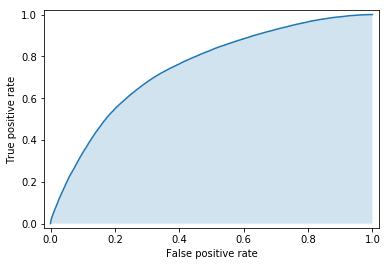

In [30]:
y_pred_proba
eps = .02
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
f = plt.plot(fpr, tpr)  # plot ROC curve
f = plt.fill_between(fpr, tpr, 0, alpha=.2)  # fill AUC
f = plt.xlim(-eps, 1+eps), plt.ylim(-eps, 1+eps)
f = plt.xlabel('False positive rate'), plt.ylabel('True positive rate')


Model Performance on the testing set:

In [36]:
y_pred_class= model_logistic_regression_binary_clf.predict(X_test)
Accuracy_score=metrics.accuracy_score(y_test, y_pred_class)
Precision_score=metrics.precision_score(y_test, y_pred_class)
Recall_score=metrics.recall_score(y_test, y_pred_class)
f1_score=metrics.f1_score(y_test, y_pred_class)
roc_auc_score = metrics.roc_auc_score(y_test, y_pred_class)

print('Accuracy Score: ', Accuracy_score)
print('Precision Score: ', Precision_score)
print('Recall Score: ', Recall_score)
print('Roc Auc Score: ', roc_auc_score)
print('F1 Score: ', f1_score)


Accuracy Score:  0.6959780750040993
Precision Score:  0.663067534035276
Recall Score:  0.5541419123416658
Roc Auc Score:  0.6759803690244688
F1 Score:  0.6037309559429671


In [37]:
y_pred_proba_testing_set=np.array(list(zip(*model_logistic_regression_binary_clf.predict_proba(X_test)))[1])

In [38]:
fpr_test, tpr_test, threshold_test=roc_curve(y_test, y_pred_proba_testing_set)

Text(0.5,1,'Model Performance Evaluation: Roc Auc Curve for testing set')

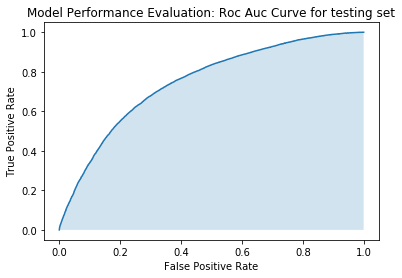

In [39]:
plt.plot(fpr_test, tpr_test)
plt.fill_between(fpr_test, tpr_test, alpha=0.2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Model Performance Evaluation: Roc Auc Curve for testing set")

Model Prediction:

In [40]:
model_logistic_regression_binary_clf.predict(X_train)

array([ True, False,  True, ..., False, False, False])

In [41]:
prediction_logistic_regression=pd.Series(model_logistic_regression_binary_clf.predict(X_train))

The model prediction outcome only has one single result: True:

In [42]:
prediction_logistic_regression.unique()

array([ True, False])

In [43]:
prediction_probability_logistic_regression=list(zip(*model_logistic_regression_binary_clf.predict_proba(X_train)))[1]

Below is the distribution of the prediction probability:

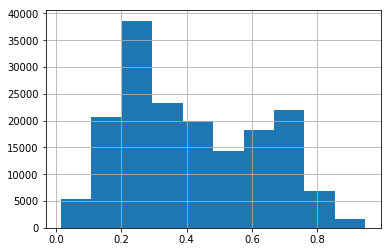

In [44]:
pd.Series(list(prediction_probability_logistic_regression)).hist()

Logistic Regression Coefficient:

In [45]:
logistic_regression_coefficient_df=pd.DataFrame(list(zip(feature_list, model_logistic_regression_binary_clf.coef_[0])), columns=['feature_name', 'beta'])

In [46]:
logistic_regression_coefficient_df.head()

,feature_name,beta
0,number_of_active_day_as_of_latest_date,0.000582
1,number_of_days_since_account_creation_as_of_la...,-0.000017
2,gender_FEMALE,-0.137438
3,gender_MALE,-0.088205
4,gender_OTHER,0.084767


Sort beta to get important coefficients:

In [47]:
logistic_regression_coefficient_df.sort_values(by='beta', ascending=False).head(10)

,feature_name,beta
12,signup_flow_3,0.775530
158,Total time spent (in seconds)_bucket_(2444996....,0.469926
150,"age_bucket_(27.0, 32.0]",0.441896
6,signup_method_basic,0.418802
151,"age_bucket_(32.0, 36.0]",0.374224
58,affiliate_channel_seo,0.307307
71,affiliate_provider_other,0.298901
31,language_en,0.270806
149,"age_bucket_(17.999, 27.0]",0.258292
56,affiliate_channel_sem-brand,0.239614


Add a column called coefficient direction with two value: "Positive" and "Negative"

In [48]:
logistic_regression_coefficient_df['coefficient_direction']=''
logistic_regression_coefficient_df.loc[logistic_regression_coefficient_df['beta']<=0 ,'coefficient_direction']='Negative'
logistic_regression_coefficient_df.loc[logistic_regression_coefficient_df['beta']>0 ,'coefficient_direction']='Positive'

In [49]:
logistic_regression_coefficient_df['coefficient_direction'].unique()

array(['Positive', 'Negative'], dtype=object)

In [50]:
logistic_regression_coefficient_df['odd_coefficient']=np.exp(logistic_regression_coefficient_df['beta'])

In [51]:
logistic_regression_coefficient_df.sort_values(by='odd_coefficient', ascending=False, inplace=True)

In [52]:
logistic_regression_coefficient_df.set_index('feature_name', inplace=True)

Display the top 15 most important features to classify the users into booking versus not booking:

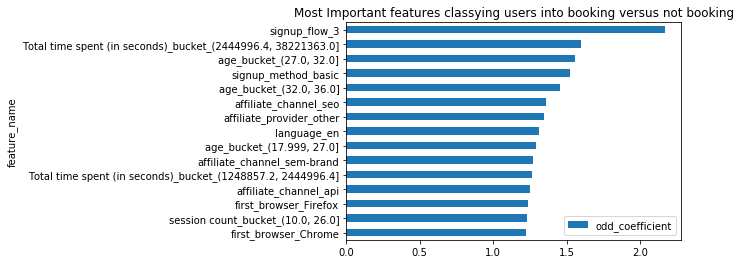

In [53]:
f1=logistic_regression_coefficient_df[:15][['odd_coefficient']].sort_values(by='odd_coefficient',ascending=True).plot(kind='barh', title="Most Important features classying users into booking versus not booking")

Display the top 15 most important positive features to classify the users into booking versus not booking:

In [54]:
logistic_regression_coefficient_df_positive=logistic_regression_coefficient_df.loc[logistic_regression_coefficient_df['coefficient_direction']=='Positive']
logistic_regression_coefficient_df_positive.sort_values(by='odd_coefficient', ascending=False, inplace=True)

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


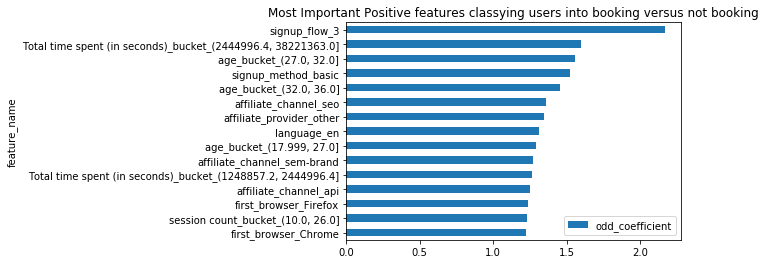

In [55]:
f2=logistic_regression_coefficient_df_positive[:15][['odd_coefficient']].sort_values(by='odd_coefficient',ascending=True).plot(kind='barh', title="Most Important Positive features classying users into booking versus not booking")

Display the top 15 most important negative features to classify the users into booking versus not booking:

In [56]:
logistic_regression_coefficient_df_negative=logistic_regression_coefficient_df.loc[logistic_regression_coefficient_df['coefficient_direction']=='Negative']
logistic_regression_coefficient_df_negative.sort_values(by='odd_coefficient', ascending=False, inplace=True)

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


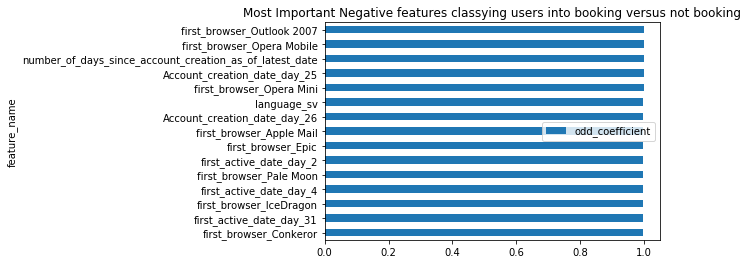

In [57]:
f3=logistic_regression_coefficient_df_negative[:15][['odd_coefficient']].sort_values(by='odd_coefficient',ascending=True).plot(kind='barh', title="Most Important Negative features classying users into booking versus not booking")

# Use Decision Tree (Single Tree)  to fit the model:

In [30]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Define the features for the model:

In [59]:
feature_list=list(user_training_dataset_update_binary_classfication1.columns)

For the tree-based model, I'm going to remove the fields that contain "_bucket" for total time spend and session count

In [22]:
feature_list1=[i for i in feature_list if "Total time spent (in seconds)_bucket" not in i]

In [23]:
feature_list1=[i for i in feature_list1 if "session count_bucket_" not in i]

In [24]:
feature_list1= [i for i in feature_list1 if i!="trip_booking_flag"]

Define the label and the features:

In [63]:
y,X=user_training_dataset_update_binary_classfication1.trip_booking_flag, user_training_dataset_update_binary_classfication1[feature_list1]

Create test and train set and use the training dataset for training the model:

In [64]:
from sklearn.cross_validation import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=321)

Training the decision tree on the training dataset:

In [66]:
model_decisiontree_binary_clf=DecisionTreeClassifier(random_state=321).fit(X_train,y_train)
cross_val_score(model_decisiontree_binary_clf, X_train, y_train, cv=5).mean()

0.6219840914868113

Below is the model performance on the training set:

In [68]:
print("accuracy score:", cross_val_score(model_decisiontree_binary_clf, X_train,y_train, cv=5))
print("precision score: ", cross_val_score(model_decisiontree_binary_clf, X_train,y_train, cv=5, scoring='precision').mean())
print("recall score: ", cross_val_score(model_decisiontree_binary_clf, X_train,y_train, cv=5, scoring='recall').mean())
print("roc auc score: ", cross_val_score(model_decisiontree_binary_clf, X_train, y_train, cv=5, scoring='roc_auc').mean())
print("f1 score: ", cross_val_score(model_decisiontree_binary_clf, X_train, y_train, cv=5, scoring='f1').mean())

accuracy score: [0.6202969  0.62268681 0.6190267  0.62415086 0.62375919]
precision score:  0.5472903851902198
recall score:  0.5267827379213339
roc auc score:  0.605841948232986
f1 score:  0.536832608259558


Model Performacne on the testing dataset:

In [69]:
y_pred_class= model_decisiontree_binary_clf.predict(X_test)
Accuracy_score=metrics.accuracy_score(y_test, y_pred_class)
Precision_score=metrics.precision_score(y_test, y_pred_class)
Recall_score=metrics.recall_score(y_test, y_pred_class)
f1_score=metrics.f1_score(y_test, y_pred_class)
roc_auc_score = metrics.roc_auc_score(y_test, y_pred_class)

print('Accuracy Score: ', Accuracy_score)
print('Precision Score: ', Precision_score)
print('Recall Score: ', Recall_score)
print('Roc Auc Score: ', roc_auc_score)
print('F1 Score: ', f1_score)


Accuracy Score:  0.6227776346302499
Precision Score:  0.55201908530199
Recall Score:  0.530236977420076
Roc Auc Score:  0.6098904553215949
F1 Score:  0.5409088317463938


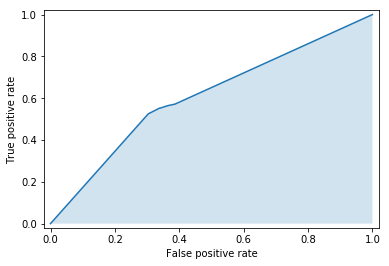

In [70]:
y_pred_proba_testing_set
eps = .02
y_pred_proba_testing_set = np.array(list(zip(*model_decisiontree_binary_clf.predict_proba(X_test))))[1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_testing_set)
f = plt.plot(fpr, tpr)  # plot ROC curve
f = plt.fill_between(fpr, tpr, 0, alpha=.2)  # fill AUC
f = plt.xlim(-eps, 1+eps), plt.ylim(-eps, 1+eps)
f = plt.xlabel('False positive rate'), plt.ylabel('True positive rate')


Feature Importance for the model:

In [71]:
model_decisiontree_binary_clf_feature_importance_df=pd.DataFrame(list(zip(feature_list1, model_decisiontree_binary_clf.feature_importances_)), columns=['feature name', 'feature importance'])

In [72]:
model_decisiontree_binary_clf_feature_importance_df=model_decisiontree_binary_clf_feature_importance_df.sort_values(by='feature importance', ascending=False)

In [73]:
model_decisiontree_binary_clf_feature_importance_df.set_index("feature name", inplace=True)

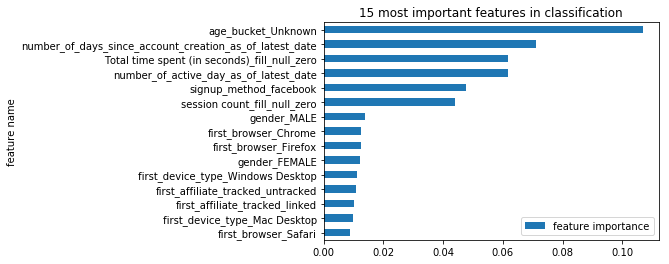

In [74]:
model_decisiontree_binary_clf_feature_importance_df[:15][['feature importance']].sort_values(by='feature importance', ascending=True).plot(kind='barh', title="15 most important features in classification")

# Try Random Forest with a number of trees:

Define the features and label:

In [25]:
y,X=user_training_dataset_update_binary_classfication1.trip_booking_flag, user_training_dataset_update_binary_classfication1[feature_list1]

Create test and train set and use the training dataset for training the model:

In [26]:
from sklearn.cross_validation import train_test_split

C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print("Shape of features of training dataset: ", X_train.shape)
print("Shape of features of testing dataset: ", X_test.shape)
print("Shape of labels of training dataset :", y_train.shape)
print("Shape of labels of testing dataset: ", y_test.shape)

Shape of features of training dataset:  (170760, 266)
Shape of features of testing dataset:  (42691, 266)
Shape of labels of training dataset : (170760,)
Shape of labels of testing dataset:  (42691,)


Train the Random forest model on the training dataset and append the performance metrics based on the testing dataset into the score dataframe.

When fitting the model, adjust the n_estimators and criterion to try out different number of trees and different algorithms for splitting nodes: 
- Algorithm: Gini and Entropy  
- Different number of estimators 10, 20, 50, 100, 150.

In [33]:
%time
random_forest_score=[]
n_estimators_list=[10, 20, 50, 100, 150]
for n_estimator in n_estimators_list:
    for criterion in ['gini', 'entropy']:
        start_time=time.time()
        model_random_forest_binary_clf=RandomForestClassifier(n_estimators=n_estimator,criterion=criterion, n_jobs=-1).fit(X_train,y_train)
        end_time=time.time()
        runing_time=end_time-start_time
        y_pred_class=model_random_forest_binary_clf.predict(X_test)
        Accuracy_score=metrics.accuracy_score(y_test, y_pred_class)
        Precision_score=metrics.precision_score(y_test, y_pred_class)
        Recall_score=metrics.recall_score(y_test, y_pred_class)
        f1_score=metrics.f1_score(y_test, y_pred_class)
        roc_auc_score = metrics.roc_auc_score(y_test, y_pred_class)
        
        random_forest_score.append(dict(n_estimator=n_estimator, criterion=criterion,  Accuracy=Accuracy_score, Precision=Precision_score, Recall=Recall_score, f1= f1_score,roc_auc=roc_auc_score, runing_time=runing_time ))
        
random_forest_score=pd.DataFrame(random_forest_score)


Wall time: 0 ns


Below is the output of the random forest classfication model:

 - Entropy is doing better than gini
 - The higher the estimators the bettter the performance is
 - Based ont the output dataframe, I decided to pick entropy algorithm with 150 trees

In [34]:
random_forest_score

,Accuracy,Precision,Recall,criterion,f1,n_estimator,roc_auc,runing_time
0,0.650769,0.594911,0.516080,gini,0.552699,10,0.631807,7.996
1,0.648521,0.591409,0.515296,entropy,0.550735,10,0.629765,6.616
2,0.660233,0.602026,0.552611,gini,0.576261,20,0.645081,12.294
3,0.659600,0.601456,0.550706,entropy,0.574963,20,0.644270,13.413
4,0.665011,0.605084,0.572165,gini,0.588164,50,0.651940,24.649
5,0.666276,0.606369,0.575078,entropy,0.590309,50,0.653437,26.979
6,0.668197,0.608241,0.579785,gini,0.593672,100,0.655750,44.844
7,0.671430,0.611666,0.586340,entropy,0.598736,100,0.659450,49.559
8,0.670469,0.610682,0.584267,gini,0.597182,150,0.658333,67.136
9,0.670258,0.610115,0.585332,entropy,0.597466,150,0.658302,70.786


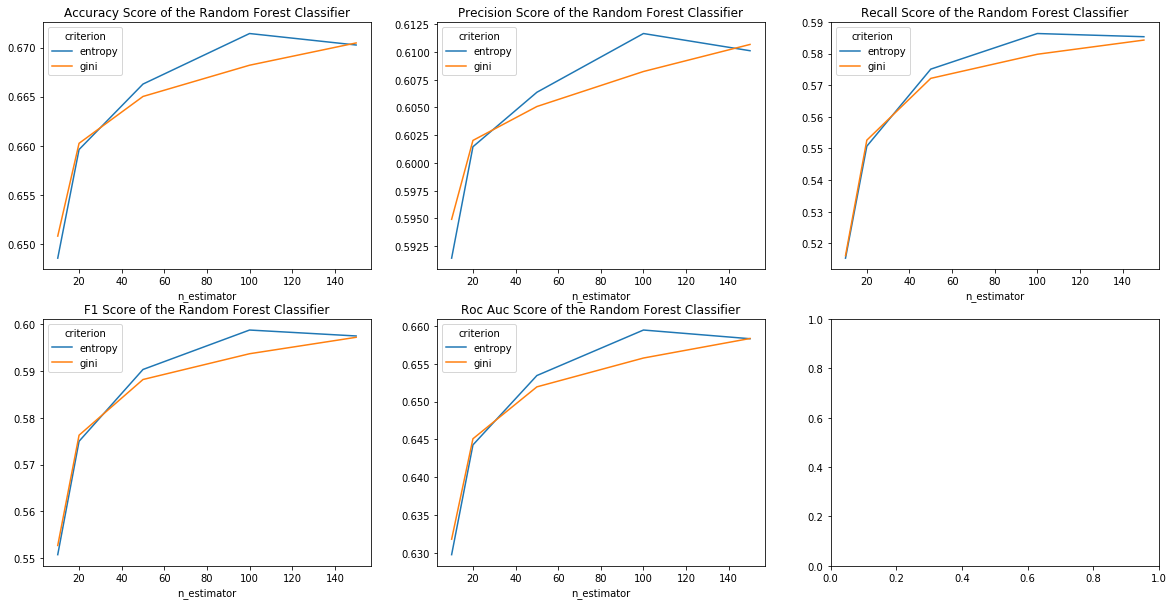

In [35]:
fig, axes=plt.subplots(2,3,figsize=(20, 10))
random_forest_score.groupby(['n_estimator', 'criterion'])['Accuracy'].mean().unstack().plot(title="Accuracy Score of the Random Forest Classifier", ax=axes[0,0])
random_forest_score.groupby(['n_estimator', 'criterion'])['Precision'].mean().unstack().plot(title="Precision Score of the Random Forest Classifier", ax=axes[0,1])
random_forest_score.groupby(['n_estimator', 'criterion'])['Recall'].mean().unstack().plot(title="Recall Score of the Random Forest Classifier", ax=axes[0,2])
random_forest_score.groupby(['n_estimator', 'criterion'])['f1'].mean().unstack().plot(title="F1 Score of the Random Forest Classifier", ax=axes[1,0])
random_forest_score.groupby(['n_estimator', 'criterion'])['roc_auc'].mean().unstack().plot(title="Roc Auc Score of the Random Forest Classifier", ax=axes[1,1])


Generate ROC AUC Curve:

In [36]:
y_pred_proba=np.array(list(zip(*model_random_forest_binary_clf.predict_proba(X_test))))[1]

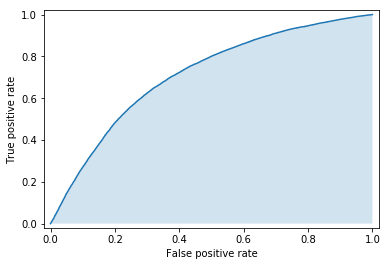

In [37]:
y_pred_proba
eps = .02
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
f = plt.plot(fpr, tpr)  # plot ROC curve
f = plt.fill_between(fpr, tpr, 0, alpha=.2)  # fill AUC
f = plt.xlim(-eps, 1+eps), plt.ylim(-eps, 1+eps)
f = plt.xlabel('False positive rate'), plt.ylabel('True positive rate')


Get the feature importance out of the model_random_forest_binary_clf classification model:

In [38]:
model_random_forest_binary_feature_importance_df=pd.DataFrame(list(zip(feature_list1, model_random_forest_binary_clf.feature_importances_)), columns=['feature name', 'feature importance'])

In [39]:
model_random_forest_binary_feature_importance_df=model_random_forest_binary_feature_importance_df.sort_values(by='feature importance', ascending=False)
model_random_forest_binary_feature_importance_df.set_index('feature name', inplace=True)

Out of all the features used in the random forest, Belw are the 15 most important features. 
Some of the importance features include number of active days as of the latest date, number of days since account creation, age bucket unknown, total time spent with the website and session/activity counts

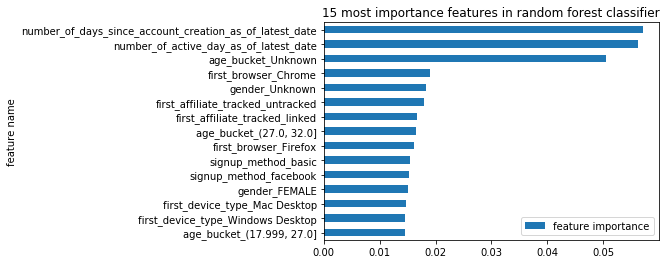

In [40]:
model_random_forest_binary_feature_importance_df[:15]. sort_values(by='feature importance', ascending=True).plot(kind='barh', title="15 most importance features in random forest classifier")

# Try Random Search with Cross Validation to get the best hyper parameter tuning:

Create initial range of values for the hyperparameter random search:

In [41]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 500, num = 50)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [150,
                  157,
                  164,
                  171,
                  178,
                  185,
                  192,
                  200,
                  207,
                  214,
                  221,
                  228,
                  235,
                  242,
                  250,
                  257,
                  264,
                  271,
                  278,
                  285,
                  292,
                  300,
                  307,
                  314,
                  321,
                  328,
                  335,
                  342,
                  350,
                  357,
                  364,
                  371,
                  378,
                  385,
                  392,
                  400,
         

Use the Randomized Search CV to get the optimal hyperparameter:

In [42]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring="roc_auc", 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 53.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 274.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 542.7min finished


In [43]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 400}

In [44]:
best_random = rf_random.best_estimator_


Create a function for performance evaluation:

In [45]:
def model_evaluation(model, test_features, test_label):
    y_pred_class=model.predict(test_features)
    
    from sklearn import metrics
    accuracy_score=metrics.accuracy_score(test_label, y_pred_class)
    precision_score=metrics.precision_score(test_label, y_pred_class)
    recall_score=metrics.recall_score(test_label, y_pred_class)
    roc_auc_score=metrics.roc_auc_score(test_label, y_pred_class)
    
    print("Model Performance:")
    
    print("accuracy score: ", accuracy_score)
    print("precision score: ", precision_score)
    print("recall score: ", recall_score)
    print("roc auc score:", roc_auc_score)
    

The roc auc score gets much better after using the recommended hyperparameter:

In [47]:
model_evaluation(best_random, X_test, y_test)

Model Performance:
accuracy score:  0.7050432175399968
precision score:  0.6638199725719985
recall score:  0.5966494845360825
roc auc score: 0.6897831007593668


In [48]:
from sklearn.model_selection import GridSearchCV

Given the best hyperparameter recommeneded by the randomized search, narrow down the range for finalize the final hyperparameters to use for the model.

- Below are the hyperpatamers recommended by the randomized search:

bootstrap: False,

max_depth: 20,

min_samples_leaf: 4,

min_samples_split: 5,

n_estimators: 400

In [49]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [ False],
     'max_depth': [15, 20, 25],
     'min_samples_leaf': [4, 5,6,10],
     'min_samples_split': [5,6,7,8,9],
     'n_estimators': [400, 403, 405]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [51]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 47.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 202.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 531.6min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 879.3min finished


Below are the parameters recommended by by the grid search:

In [52]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 403}

In [54]:
best_grid = grid_search.best_estimator_
model_evaluation(best_grid, X_test, y_test)

Model Performance:
accuracy score:  0.7067766039680494
precision score:  0.6708552378510065
recall score:  0.5862841774988794
roc auc score: 0.689813183222732


Develope a function to fit the model and evaluate the time spent and accuracy of the model:

In [55]:
from sklearn import metrics

In [56]:
def model_fitting_and_evaluation_func(model, x_train, y_train, x_test, y_test):
    n_trees=model.get_params()['n_estimators']
    n_features=x_train.shape[1]
    bootstrap_flag=get_params()['bootstrap']
    max_depth=get_params()['max_depth']
    max_features=get_params()['max_features']
    min_samples_leaf=get_params()['min_samples_leaf']
    min_samples_split=get_params()['min_samples_split']
    
    start_time=time.time()
    clf=model.fit(x_train, y_train)
    end_time=time.time()
    
    running_time=end_time-start_time
    
    y_class_pred=clf.predict(x_test)
    
    #populate all the model performance score:
    accuracy_score=metrics.accuracy_score(y_test, y_class_pred)
    precision_score=metrics.precision_score(y_test, y_class_pred)
    recall_score=metrics.recall_score(y_test, y_class_pred)
    f1_score=metrics.f1_score(y_test, y_class_pred)
    roc_auc_score=metrics.roc_auc_score(y_test, y_class_pred)
    
    performance_dict={'n_trees':n_trees, 'n_features':n_features, 'bootstrap_flag':bootstrap_flag, 'max_depth':max_depth, 'max_features':max_features, 'min_samples_leaf':min_samples_leaf, 'min_samples_split':min_samples_split, 'running_time':running_time, 'accuracy_score':accuracy_score, 'precision_score':precision_score,  'f1_score':f1_score, 'roc_auc_score':roc_auc_score }
    performance_dict_df=pd.DataFrame(performance_dict)
    return performance_dict_df
    
    
    
    

In [57]:
# Evaluate run time and prediction accuracy
def evaluate_model(model, x_train, y_train, x_test, y_test):
    n_trees = model.get_params()['n_estimators']
    n_features = x_train.shape[1]
    
    # Train and predict 10 times to evaluate time and accuracy
    predictions = []
    run_times = []
    for _ in range(10):
        start_time = time.time()
        model.fit(x_train, y_train)
        predictions.append(model.predict(x_test))
    
        end_time = time.time()
        run_times.append(end_time - start_time)
    
    # Run time and predictions need to be averaged
    run_time = np.mean(run_times)
    predictions = np.mean(np.array(predictions), axis = 0)
    
    # Calculate performance metrics
    errors = abs(predictions - y_test)
    mean_error = np.mean(errors)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    
    # Return results in a dictionary
    results = {'time': run_time, 'error': mean_error, 'accuracy': accuracy, 'n_trees': n_trees, 'n_features': n_features}
    
    return results

# Try XG Boost Classifier

In [87]:
import xgboost as xgb

In [83]:
y,X=user_training_dataset_update_binary_classfication1.trip_booking_flag, user_training_dataset_update_binary_classfication1[feature_list1]


In [84]:
from sklearn.cross_validation import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=22)

Convert the dataset into an optimized data structure called Dmatrics that XGBoost Supports

In [118]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]


In [119]:
data_dmatrix=xgb.DMatrix(data=X_train, label=y_train)

In [154]:
xg_clf=xgb.XGBClassifier(objective="binary:logistic", colsample_bytree=0.5, learning_rate=0.1, alpha=10, n_estimators=20)
params={'objective':"binary:logistic", 'colsample_bytree': 0.3, "learning_rate": 0.1, "alpha":10, "n_estimators":20}

In [155]:
xg_clf.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Return the model performance output using model_evaluation function:

In [156]:
model_evaluation(xg_clf, X_test, y_test)

Model Performance:
accuracy score:  0.6941978402942072
precision score:  0.6695664781789183
recall score:  0.5208368578356736
roc auc score: 0.6691050223948782


C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Plot feature importance:

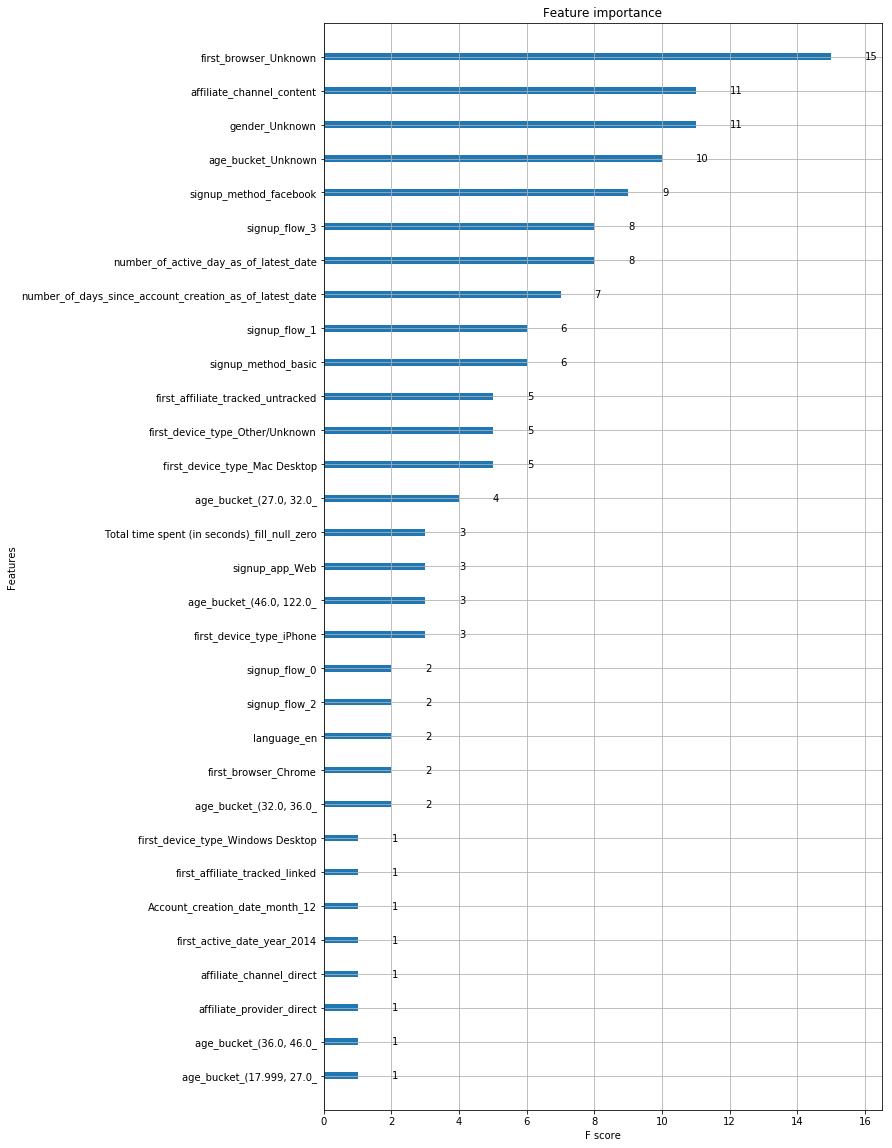

In [160]:
xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize']=[10,5]
plt.show()

# Try Randomized Search on Xgboost:
For the xgboost, I'm only focusing on optimize two hyper parameters here: n_estimators and colsample by tree

In [94]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

#Set up the range for the parameters: colsample_bytree and n_estimators:

colsample_bytree=[x for x in np.linspace(start=0.2, stop=0.8, num=4)]
n_estimators=[int(x) for x in np.linspace(start=20, stop=500, num=50)]


# Create the random grid
random_grid = {'objective': ["binary:logistic"],
               'colsample_bytree':colsample_bytree,
               'learning_rate':[0.1],
               'alpha':[10],
               'n_estimators':n_estimators}

pprint(random_grid)


{'alpha': [10],
 'colsample_bytree': [0.2, 0.4, 0.6000000000000001, 0.8],
 'learning_rate': [0.1],
 'n_estimators': [20,
                  29,
                  39,
                  49,
                  59,
                  68,
                  78,
                  88,
                  98,
                  108,
                  117,
                  127,
                  137,
                  147,
                  157,
                  166,
                  176,
                  186,
                  196,
                  206,
                  215,
                  225,
                  235,
                  245,
                  255,
                  264,
                  274,
                  284,
                  294,
                  304,
                  313,
                  323,
                  333,
                  343,
                  353,
                  362,
                  372,
                  382,
                  392,
             

In [96]:
#Get rid of the special characters from the feature names:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]


In [97]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgboost_clf = xgb.XGBClassifier(random_state = 22)

# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations, and use all available cores

xgboost_random=RandomizedSearchCV(estimator=xgboost_clf, 
                                  param_distributions=random_grid, 
                                  n_iter=50, 
                                  scoring='roc_auc', 
                                  cv=3, verbose=2, 
                                  random_state=22, 
                                  n_jobs=-1, 
                                  return_train_score=True)

# Fit the random search model
xgboost_random.fit(X_train, y_train);


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 86.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 310.9min finished


Get the best parameters from the randomized search for the xgboost:

In [98]:
xgboost_random.best_params_

{'alpha': 10,
 'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'n_estimators': 500,
 'objective': 'binary:logistic'}

Use the test dataset to evaludate the performance of the best parameters:

In [99]:
best_xgboost_random = xgboost_random.best_estimator_

model_evaluation(best_xgboost_random, X_test, y_test)

Model Performance:
accuracy score:  0.7009674170199808
precision score:  0.660838028625089
recall score:  0.5754243500817685
roc auc score: 0.6827959157252339


C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [101]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'alpha': [10],
    'colsample_bytree': [0.8],
    'learning_rate': [0.1],
    'n_estimators': [500, 600, 700],
    'objective': ['binary:logistic']
}

# Create a base model
xgboost_clf = xgb.XGBClassifier(random_state = 22)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgboost_clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [102]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

grid_search.best_params_

best_grid = grid_search.best_estimator_
model_evaluation(best_grid, X_test, y_test)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed: 45.0min remaining: 12.9min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 62.8min finished


Model Performance:
accuracy score:  0.7013422032746949
precision score:  0.6606486556193178
recall score:  0.5777928156544296
roc auc score: 0.6834592734414467


C:\Users\yuka.abe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [103]:
print( grid_search.best_params_)

{'alpha': 10, 'colsample_bytree': 0.8, 'learning_rate': 0.1, 'n_estimators': 700, 'objective': 'binary:logistic'}


The performance has slightly improved after increasding the number of estimators from 500 to 700.
So below are the parameters that will bee used for the xgboost model:
alpha: 10
colsample_bytree: 0.8
learning_rate: 0.1
number of estimators: 500
objective: binary:logistic

Plot the feature importance:

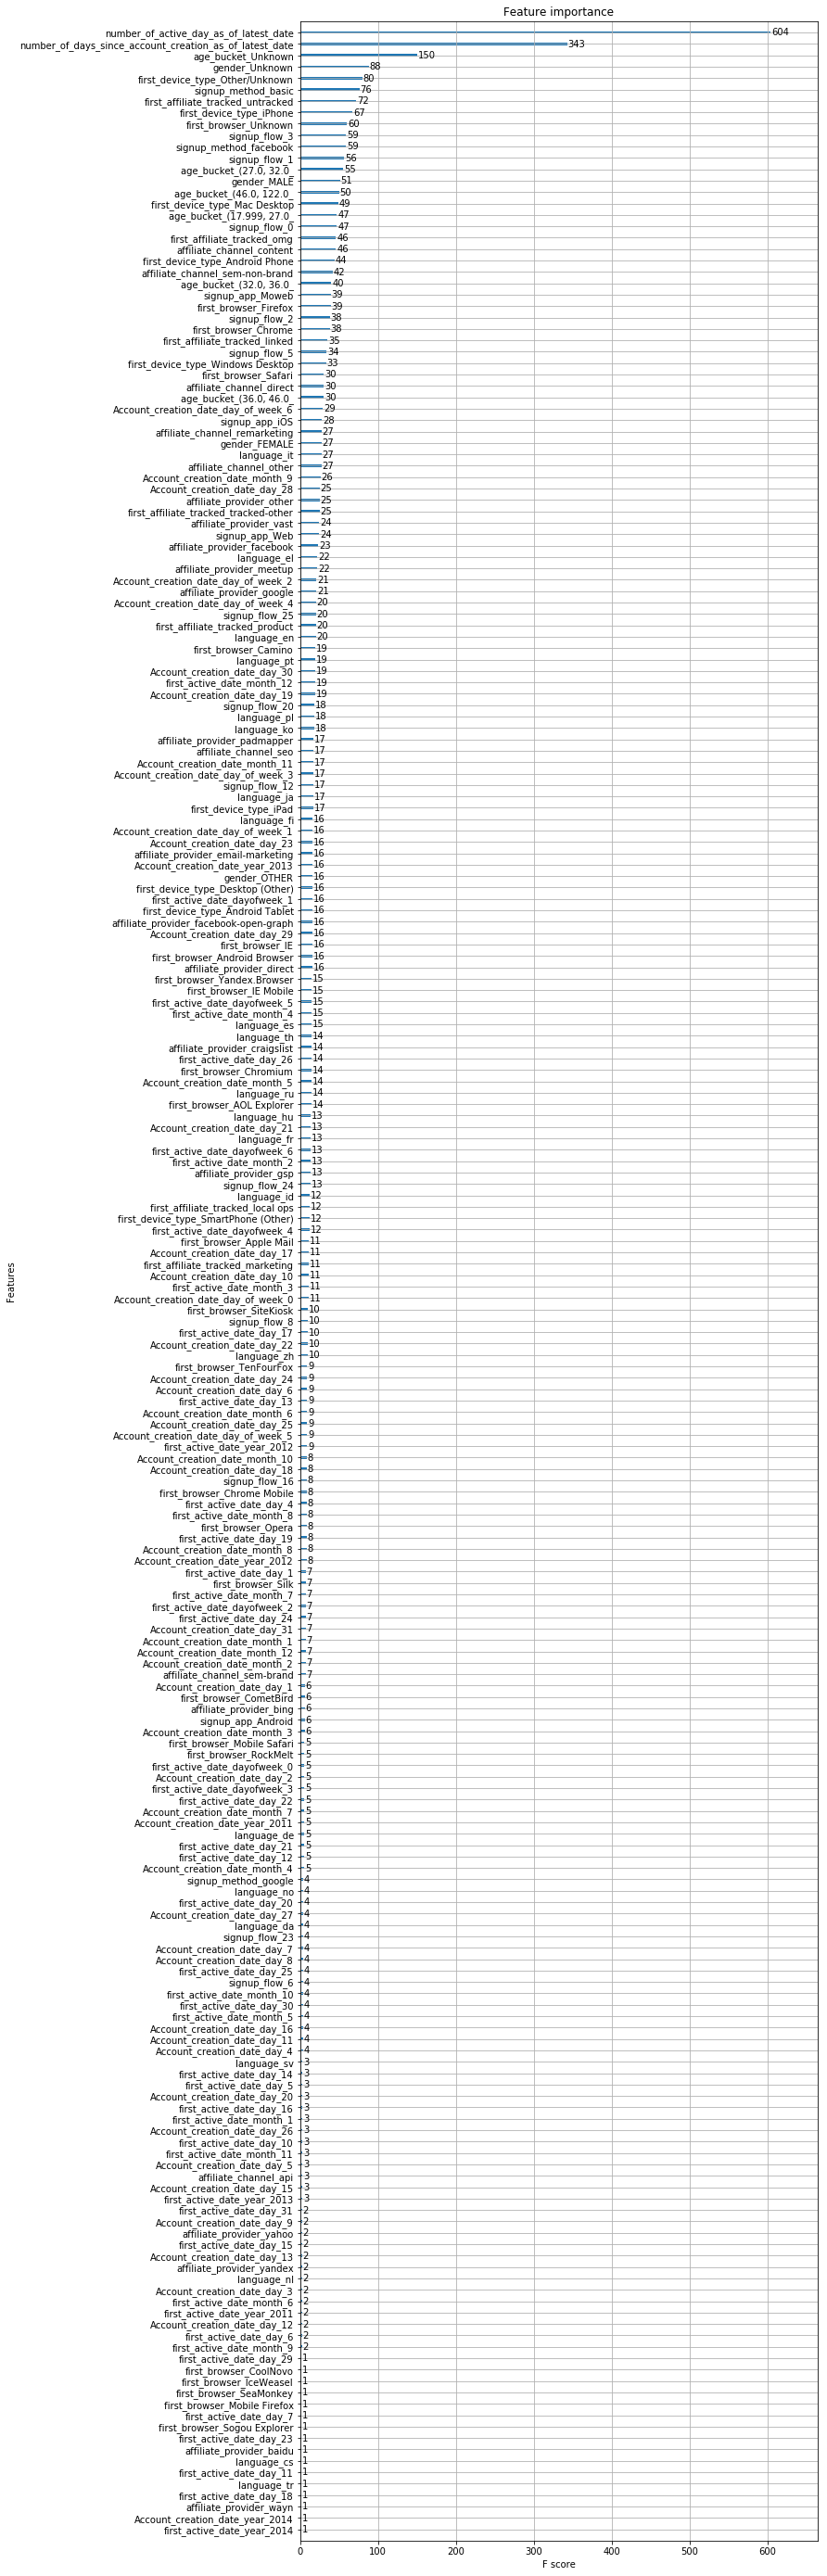

In [106]:
xgb.plot_importance(best_grid)
plt.rcParams['figure.figsize']=[10,100]
plt.show()

# Try Adaboost classifier

# Adaboost Classifier:
- Take the votes from the ensemble to classify the observation
- Exaggerate the weights of the misclassified samples when traning the data

# Drawback:


The algorithm is easily defeated by noisy data. 
The efficiency of the algorithm is highly affected by outliers as the algorithm tries to fit every single data point perfectly.


# Below is the code:

from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()

n_estimators = 50 (default value) 

base_estimator = DecisionTreeClassifier (default value)

clf.fit(x_train,y_train)

clf.predict(x_test)

In [161]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import train_test_split

In [162]:
y,X=user_training_dataset_update_binary_classfication1.trip_booking_flag, user_training_dataset_update_binary_classfication1[feature_list1]

Seperate out the data into training set (80%) and testing set (20%)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

In [166]:
%time
score=[]
n_estimators_list=[10, 20, 50, 100, 150]

for n_estimator in n_estimators_list:
    start_time=time.time()
    model_adaboost_binary_clf=AdaBoostClassifier(n_estimators=n_estimator,).fit(X_train,y_train)
    end_time=time.time()
    running_time=end_time-start_time
    y_pred_class= model_adaboost_binary_clf.predict(X_test)
    Accuracy_score=metrics.accuracy_score(y_test, y_pred_class)
    Precision_score=metrics.precision_score(y_test, y_pred_class)
    Recall_score=metrics.recall_score(y_test, y_pred_class)
    f1_score=metrics.f1_score(y_test, y_pred_class)
    roc_auc_score = metrics.roc_auc_score(y_test, y_pred_class)

    score.append(dict(n_estimator=n_estimator, accuracy=Accuracy_score, precision=Precision_score, recall=Recall_score, f1=f1_score, roc_auc=roc_auc_score, running_time=running_time))

score=pd.DataFrame(score)       


Wall time: 0 ns


In [167]:
score

,accuracy,f1,n_estimator,precision,recall,roc_auc,running_time
0,0.695088,0.597732,10,0.662897,0.544232,0.673444,12.938
1,0.693870,0.603260,20,0.654934,0.559145,0.674540,25.926
2,0.694901,0.604284,50,0.656652,0.559651,0.675496,52.328
3,0.694432,0.601716,100,0.657679,0.554530,0.674360,117.586
4,0.695369,0.601746,150,0.660060,0.552898,0.674928,177.820


Below is the output of the Adaboost classfication model:
- For the adaboost classifier, the more trees you include in the model, the higher precision score, f1 score, roc auc score are
- The more trees you include in the model, the lower the recall score gets
- As in this type of problem, I'm trying to capture as many people who are likely to make the booking as possible. Recall score is very important for the model. I would recommend using 20 as number of trees for the model.

In [168]:
score.columns

Index(['accuracy', 'f1', 'n_estimator', 'precision', 'recall', 'roc_auc',
       'running_time'],
      dtype='object')

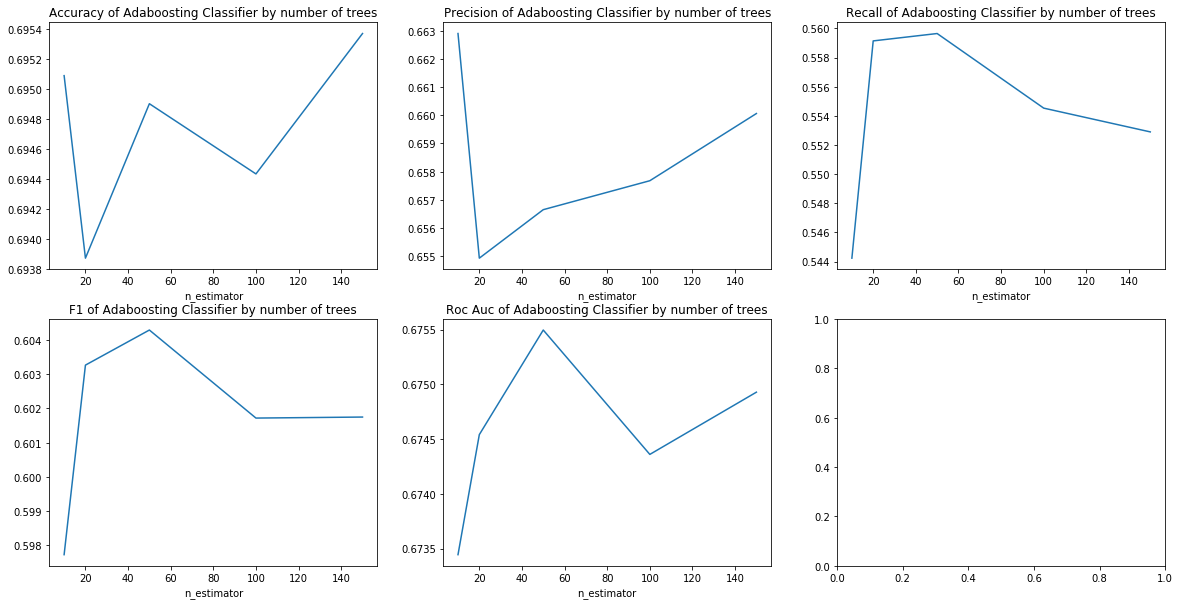

In [169]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
score.groupby(['n_estimator'])['accuracy'].mean().plot(title="Accuracy of Adaboosting Classifier by number of trees",ax =axes[0,0])
score.groupby(['n_estimator'])['precision'].mean().plot(title="Precision of Adaboosting Classifier by number of trees", ax=axes[0,1])
score.groupby('n_estimator')['recall'].mean().plot(title="Recall of Adaboosting Classifier by number of trees", ax=axes[0,2])
score.groupby('n_estimator')['f1'].mean().plot(title="F1 of Adaboosting Classifier by number of trees", ax=axes[1,0])
score.groupby('n_estimator')['roc_auc'].mean().plot(title="Roc Auc of Adaboosting Classifier by number of trees", ax=axes[1,1])

In [170]:
model_adaboost_binary_clf=AdaBoostClassifier(n_estimators=50).fit(X_train,y_train)

Get the roc auc score for the adaboost classification model.

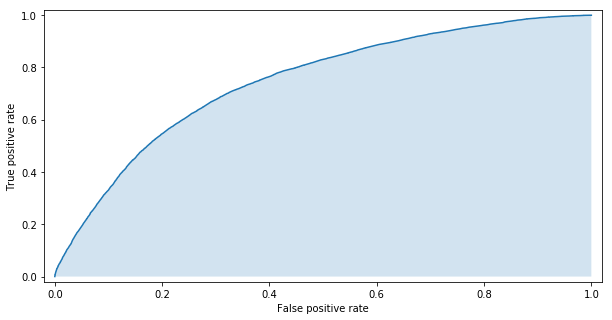

In [171]:
y_pred_proba=np.array(list(zip(*model_adaboost_binary_clf.predict_proba(X_test))))[1]

y_pred_proba
eps = .02
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
f = plt.plot(fpr, tpr)  # plot ROC curve
f = plt.fill_between(fpr, tpr, 0, alpha=.2)  # fill AUC
f = plt.xlim(-eps, 1+eps), plt.ylim(-eps, 1+eps)
f = plt.xlabel('False positive rate'), plt.ylabel('True positive rate')


Get the feature importance out of the adaboost model:

In [172]:
Adaboost_feature_importance_df=pd.DataFrame(list(zip(feature_list1 , model_adaboost_binary_clf.feature_importances_)), columns=['Feature Name', 'Feature Importance'])

In [173]:
Adaboost_feature_importance_df.set_index('Feature Name', inplace=True)

In [174]:
Adaboost_feature_importance_df=Adaboost_feature_importance_df.sort_values(by='Feature Importance', ascending=False)

By ranking on the feature importance out of the model, the most import features in the classification would be age_bucket_unknown and numbers of days since account creation as of latest day.

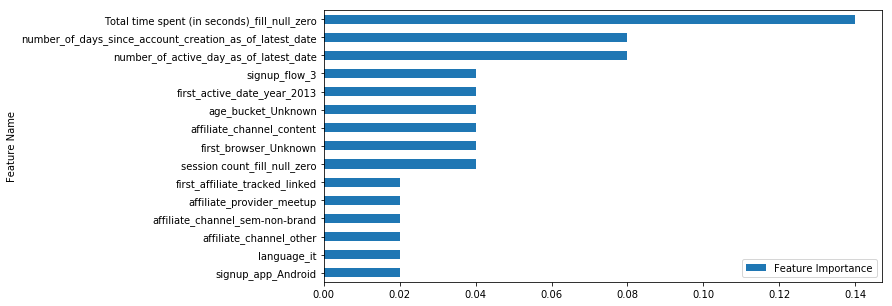

In [175]:
Adaboost_feature_importance_df[:15].sort_values(by='Feature Importance', ascending=True).plot(kind='barh')

# Try Grandient Boosting:

# Below is the code:

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

n_estimators = 100 (default)

loss function = deviance(default) used in Logistic Regression

clf.fit(x_train,y_train)

clf.predict(x_test)

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import train_test_split

In [110]:
y,X=user_training_dataset_update_binary_classfication1.trip_booking_flag, user_training_dataset_update_binary_classfication1[feature_list1]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

In [112]:
%time
score=[]
n_estimators_list=[10, 20, 50, 100, 150]

for n_estimator in n_estimators_list:
    start_time=time.time()
    model_grandient_boost_binary_clf=GradientBoostingClassifier(n_estimators=n_estimator,).fit(X_train,y_train)
    end_time=time.time()
    running_time=end_time-start_time
    y_pred_class= model_grandient_boost_binary_clf.predict(X_test)
    accuracy_score=metrics.accuracy_score(y_test, y_pred_class)
    precision_score=metrics.precision_score(y_test, y_pred_class)
    recall_score=metrics.recall_score(y_test, y_pred_class)
    f1_score=metrics.f1_score(y_test, y_pred_class)
    roc_auc_score = metrics.roc_auc_score(y_test, y_pred_class)

    score.append(dict(n_estimator=n_estimator, accuracy=accuracy_score, precision=precision_score, recall=recall_score, f1=f1_score, roc_auc=roc_auc_score, running_time=running_time))

score=pd.DataFrame(score)       


Wall time: 0 ns


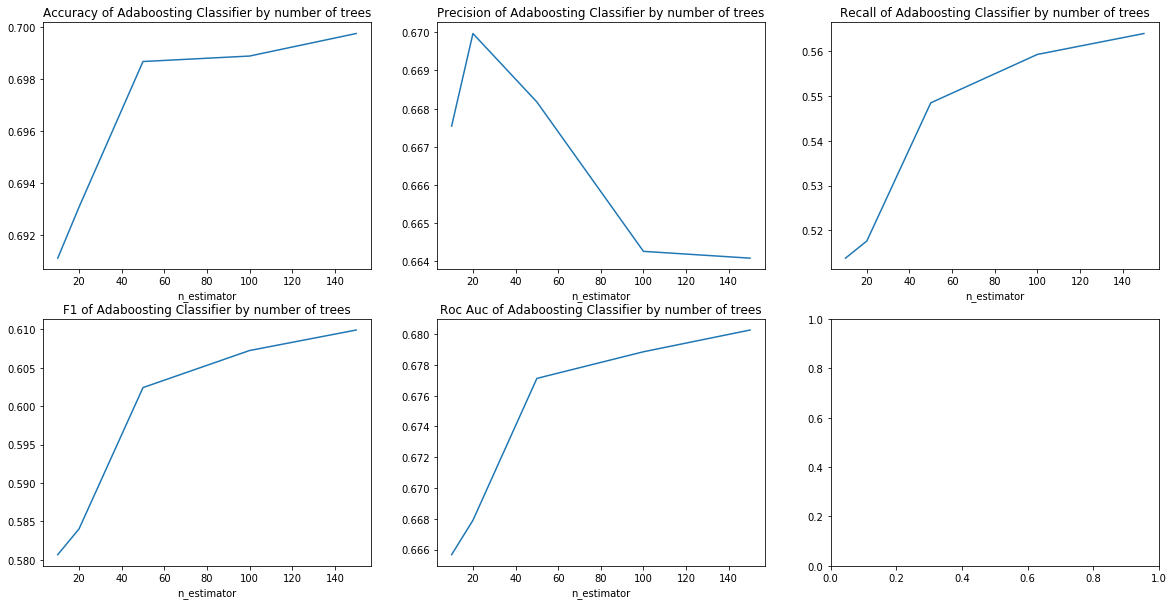

In [113]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
score.groupby(['n_estimator'])['accuracy'].mean().plot(title="Accuracy of Adaboosting Classifier by number of trees",ax =axes[0,0])
score.groupby(['n_estimator'])['precision'].mean().plot(title="Precision of Adaboosting Classifier by number of trees", ax=axes[0,1])
score.groupby('n_estimator')['recall'].mean().plot(title="Recall of Adaboosting Classifier by number of trees", ax=axes[0,2])
score.groupby('n_estimator')['f1'].mean().plot(title="F1 of Adaboosting Classifier by number of trees", ax=axes[1,0])
score.groupby('n_estimator')['roc_auc'].mean().plot(title="Roc Auc of Adaboosting Classifier by number of trees", ax=axes[1,1])

In [115]:
score

,accuracy,f1,n_estimator,precision,recall,roc_auc,running_time
0,0.691106,0.580660,10,0.667544,0.513787,0.665665,35.079
1,0.693073,0.584019,20,0.669969,0.517614,0.667900,52.958
2,0.698672,0.602423,50,0.668175,0.548452,0.677119,113.982
3,0.698883,0.607253,100,0.664260,0.559257,0.678850,258.095
4,0.699749,0.609921,150,0.664082,0.563928,0.680263,401.151


In [132]:
gradient_descent_boosting_df=pd.DataFrame(list(zip(feature_list1, model_grandient_boost_binary_clf.feature_importances_)), columns=['feature name', 'feature importance'])

In [135]:
gradient_descent_boosting_df.set_index('feature name', inplace=True)

In [140]:
gradient_descent_boosting_df.sort_values(by='feature importance', ascending=False, inplace=True)

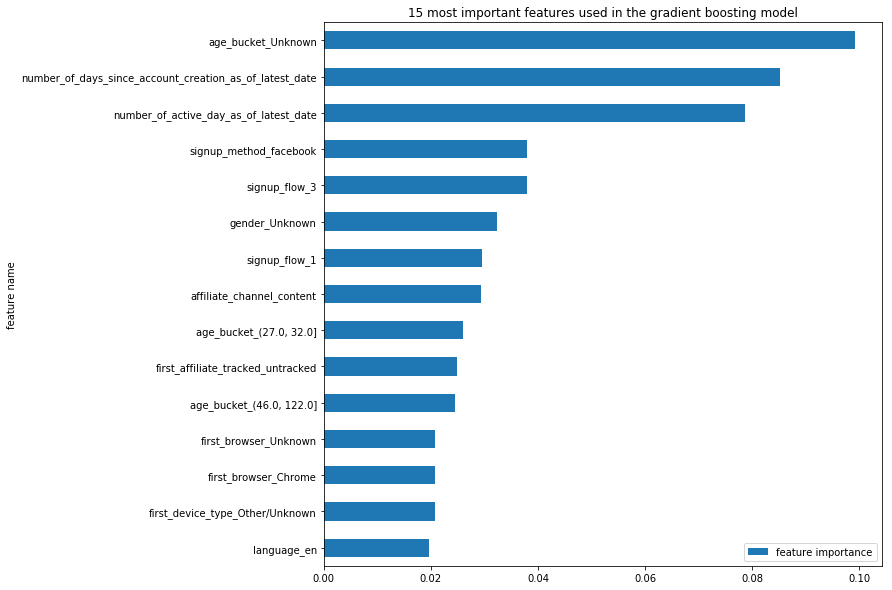

In [147]:
plt.rcParams['figure.figsize']=[10,10]
gradient_descent_boosting_df[:15].sort_values(by='feature importance', ascending=True).plot(kind='barh', title="15 most important features used in the gradient boosting model")

plt.show()